# Roughness map tests

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic
import math

## 1) Spheres

In [83]:
reload(bf)
reload(ic)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\Cuttings\\plot.py'>

### Test with test image sphere without noise

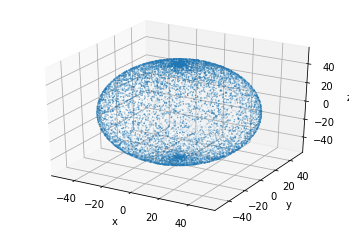

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

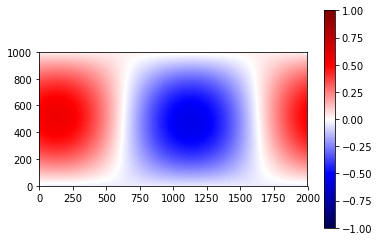

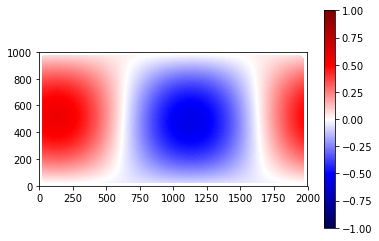

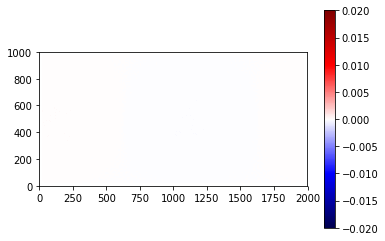

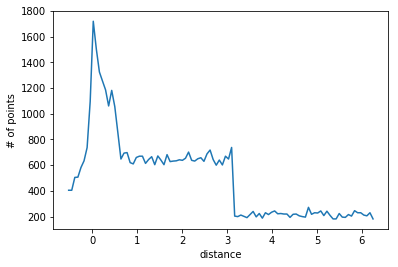

In [3]:
ellipsoid = {'a': 50, 'b': 50, 'c': 50}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=0.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 1)
plot.roughness_distance_histogram(distance)

data min max
theta 0.0012735587327305686 6.282703824065029
phi 0.002123014588176916 3.140512114004029
alpha 0.0012735587327305686 6.282703824065029
beta 0.0021230145881769155 3.140512114004029
distance -0.4956659658597502 0.495840244660684


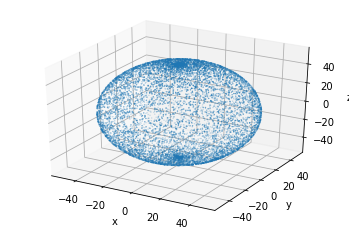

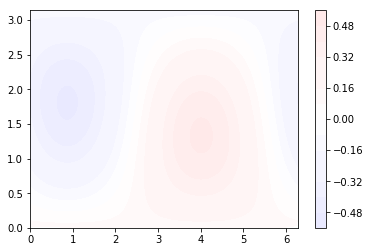

mean absolute roughness distance = 0.21625154988688192


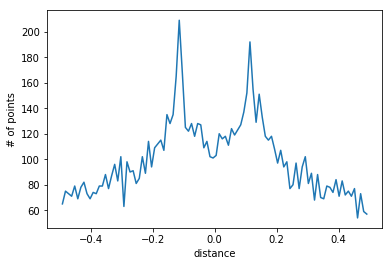

In [96]:
ellipsoid = {'a': 50, 'b': 50, 'c': 50}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=0.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)
print('mean absolute roughness distance =', ic.roughness_mean(distance))

### Test with test image sphere with noise

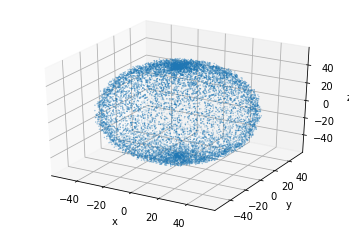

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

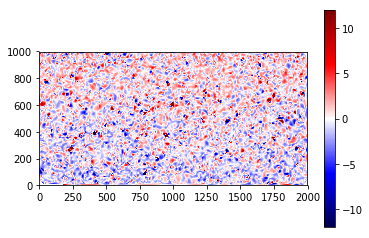

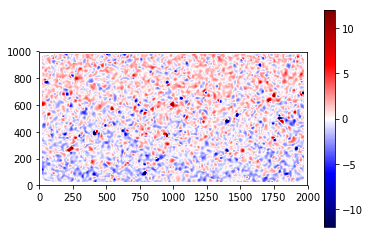

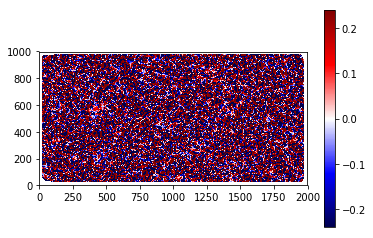

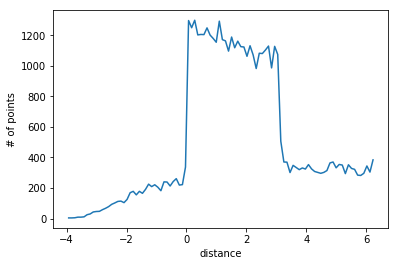

In [5]:
ellipsoid = {'a': 50, 'b': 50, 'c': 50}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=5.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)

data min max
theta 0.0007998016828093443 6.282447853277986
phi 0.0018289514375285356 3.137288805699651
alpha 0.0007998016828093442 6.282447853277986
beta 0.0018289514375285356 3.137288805699651
distance -4.372937665080343 4.197370066963138


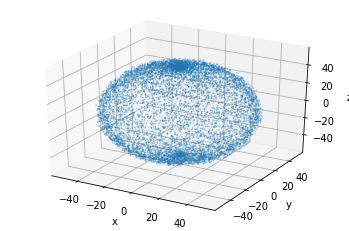

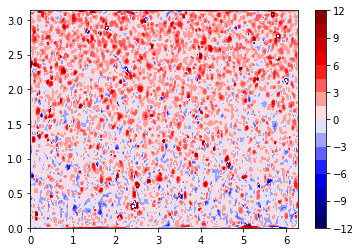

mean absolute roughness distance = 1.2981891930423841


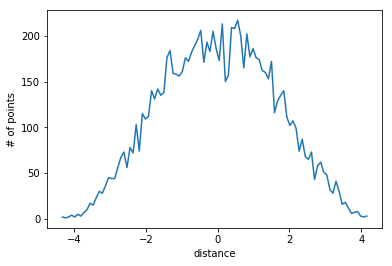

In [93]:
reload(plot)
ellipsoid = {'a': 50, 'b': 50, 'c': 50}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=5.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)
print('mean absolute roughness distance =', ic.roughness_mean(distance))

data min max
theta 0.0006590308389432547 6.283142435875605
phi 0.005011287970458046 3.1288486127642816
alpha 0.0006590308389432546 6.283142435875605
beta 0.005011287970458047 3.1288486127642816
distance -7.578970422593798 8.188821284878024


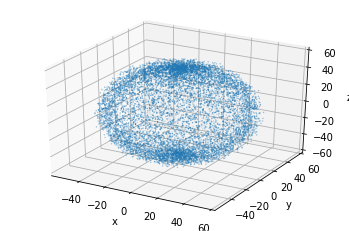

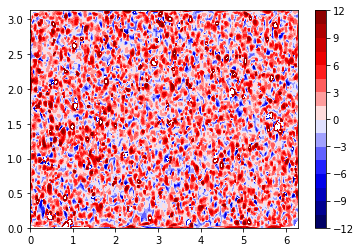

mean absolute roughness distance = 2.4282385291566357


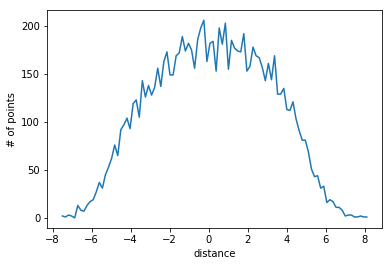

In [92]:
reload(plot)
ellipsoid = {'a': 50, 'b': 50, 'c': 50}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=10.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)
print('mean absolute roughness distance =', ic.roughness_mean(distance))

## 2) Ellipsoids

### Test with test image ellipsoid without noise

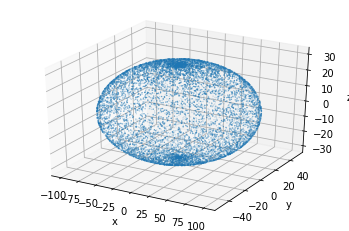

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

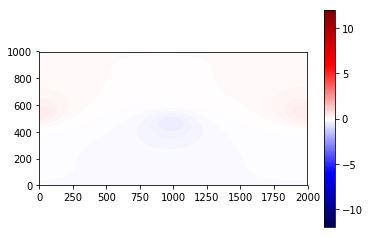

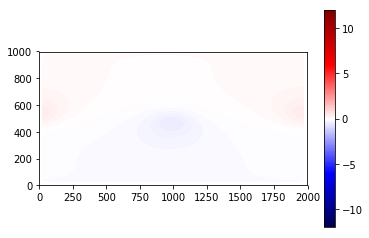

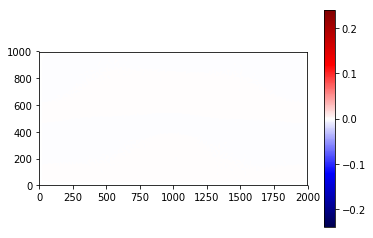

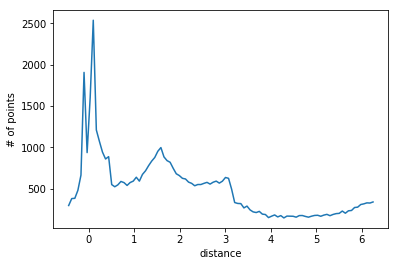

In [7]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=0.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)

data min max
theta 3.4107238847618445e-05 6.283098305547479
phi 0.0009938977814911096 3.140181413595337
alpha 6.821447761588272e-05 6.2830113039166875
beta 0.0003138380199757164 3.1408065248439665
distance -0.12029703658353696 0.12020750791596413


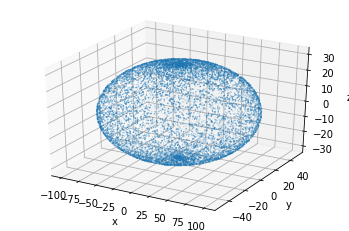

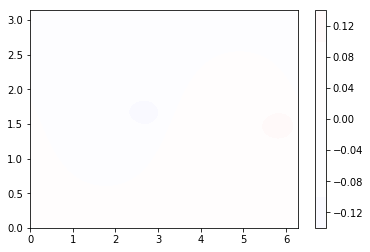

mean absolute roughness distance = 0.04298709160790211


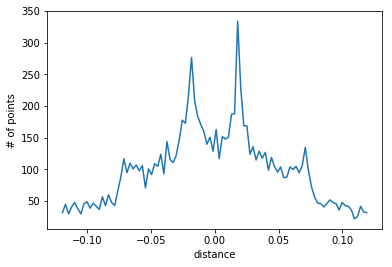

In [90]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=0.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)
print('mean absolute roughness distance =', ic.roughness_mean(distance))

### Test with test image ellipsoid with noise

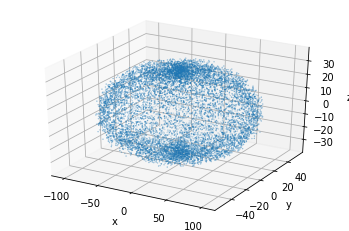

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

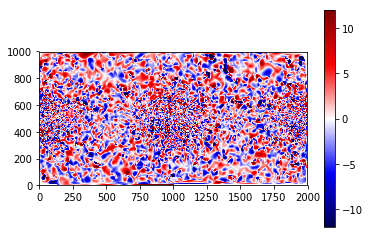

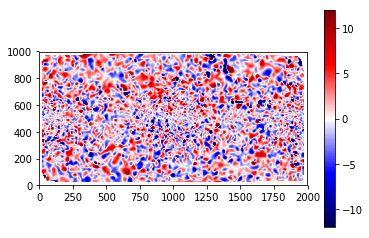

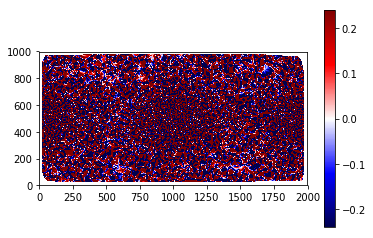

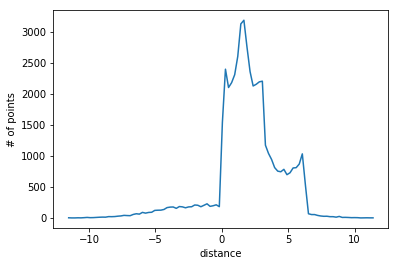

In [6]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=10.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)

data min max
theta 0.00020889252541157245 6.2819215959657555
phi 0.014069156379226053 3.132498407299204
alpha 0.00041778503259264153 6.280657888788119
beta 0.008090552623944832 3.1361631252350572
distance -11.628275929840086 10.70654748149353


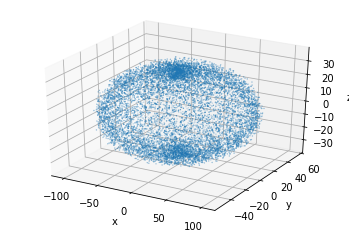

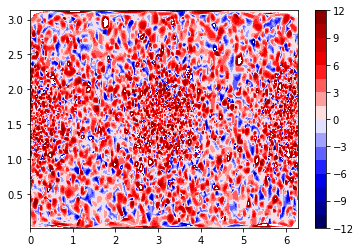

mean absolute roughness distance = 3.138897170806313


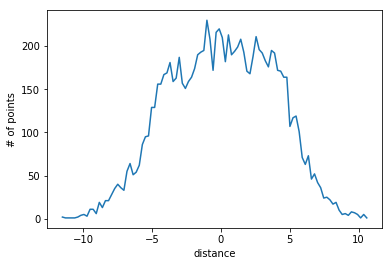

In [91]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
ellipsoid_aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=10.,
                                     angles=(0., 0.))
plot.scatter_plot(ellipsoid_aggregate)
distance = ic.roughness_distance(ellipsoid_aggregate, ellipsoid)
plot.roughness_map_plot(distance, 12)
plot.roughness_distance_histogram(distance)
print('mean absolute roughness distance =', ic.roughness_mean(distance))